In [19]:
import torch

x = torch.tensor(1., requires_grad = True) # requries_grad = True(= 변수다.), False(= 상수다.)

y = x **2

print(y)

z = 3 * y

print(z) # mulBackward()

z.backward()
print(x.grad) # chain rule로 알아냄
print(y.grad) # none 뜨는 이유는 leaf tensor가 아니라고 뜸. x가 leaf tensor

# y.retain_grad()
# print(y.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(3., grad_fn=<MulBackward0>)
tensor(6.)
None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [ ]:
x = torch.tensor(1., requires_grad = True)
y = x ** 2

z = 3 * y

y.backward() # 이렇게 하면 y에서부터 뒤로 넘어감 (backward)
print(x.grad)

tensor(2.)


In [ ]:
x =torch.tensor(1., requires_grad = True)
a = x ** 2   # da/ax = 2x
b = a + 1   # db/da = 1
print(b)
c = b**2    # dc/db = 2b
c.backward()    # dc/dx = dc/db * db/da * da/ax = 2x * 1 * 2b (x = 1, b = 2) = 8
print(x.grad) 

tensor(2., grad_fn=<AddBackward0>)
tensor(8.)


In [ ]:
x = torch.tensor(1., requires_grad = True)
y = torch.tensor(1., requires_grad = True)

z = x*(y**2)
z.backward()
print(x.grad) # dz/dx = y^2 (x=1, y=1) = 1
print(y.grad) # dz/dy = 2xy (x=1, y=1) = 2

tensor(1.)
tensor(2.)


In [ ]:
x = torch.tensor(1., requires_grad = True)
x.requries_grad = False # grad_func 떼버림
# 때버리는 이유는 나중에 그림(plot) 그리고 싶어서
y = x**2
print(y)

tensor(1., grad_fn=<PowBackward0>)


In [ ]:
x = torch.tensor(1., requires_grad = True)
x = x.detach() # 보통 detach를 많이 씀.(requries_grad = False 인 x를 만들어서 닫시 넣어 주기 때문에 메모리적으로는 별로)
y = x**2
print(y) 

tensor(1.)


In [ ]:
x = torch.tensor([1.,2.,3.], requires_grad = True) # x1 = 1, x2 = 2, x3 = 3 이말,  
y = torch.sum(x**2) # 1 + 4 + 9 = 14
y.backward() # dy/dx1 = 2x1  dy/dx2 = 2x2  dy/dx3 = 2x3

print(y)
print(x.grad)


tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In [ ]:
x = torch.tensor([1., 2., 3.,], requires_grad = True)

y = x**2
print(y)
# y.backward() 에러 뜸. 
# 에러 안뜰려면 torch.autograd.functional.jacobian
# 궁금하면 "vjp" = "vector jacobian product"를 공부해보세용


tensor([1., 4., 9.], grad_fn=<PowBackward0>)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=ed2a100147ed69a18929bf9d80ccb0d15e2481ea7060bd9ade9c1206bcd8324f
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


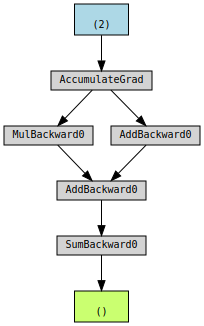

In [ ]:
!pip install torchviz

from torchviz import make_dot

x = torch.ones(2, requires_grad=True)
y = 2*x
z = 3+x
r = (y+z).sum()
make_dot(r)

## 간단한 인공신경망 만들기

In [ ]:
import torch
from torch import nn

input = torch.tensor([1.])
model = nn.Linear(1,1) # 입력 node 한 개, 출력 node 한 개인 인공 신경 만듦
print(model)

print(model.weight)
print(model.bias)

output = model(input)  # output = x * w + b 
print(output) 

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.5523]], requires_grad=True)
Parameter containing:
tensor([0.3865], requires_grad=True)
tensor([-0.1658], grad_fn=<AddBackward0>)


In [ ]:
fc1 = nn.Linear(1,3)
fc2 = nn.Linear(3,1)

print(fc1.weight)
print(fc1.bias)
print(fc2.weight)
print(fc2.bias)
x = torch.tensor([1.])

y = fc1(x)
print('y = ',y)

z = fc2(y)
print('z = ', z)

input = torch.tensor([1.])
print(input * fc1.weight.T + fc1.bias) # fc1.bias = fc1.bias.reshape(1,-1)
print((input @ fc1.weight.T + fc1.bias.reshape(1,-1))@ fc2.weight.T + fc2.bias)

Parameter containing:
tensor([[-0.5579],
        [ 0.0829],
        [-0.5305]], requires_grad=True)
Parameter containing:
tensor([ 0.9549,  0.8954, -0.0804], requires_grad=True)
Parameter containing:
tensor([[ 0.1894,  0.1838, -0.2365]], requires_grad=True)
Parameter containing:
tensor([-0.3464], requires_grad=True)
y =  tensor([ 0.3970,  0.9783, -0.6109], grad_fn=<AddBackward0>)
z =  tensor([0.0531], grad_fn=<AddBackward0>)
tensor([[ 0.3970,  0.9783, -0.6109]], grad_fn=<AddBackward0>)
tensor([[0.0531]], grad_fn=<AddBackward0>)
